In [24]:
import networkx as nx
from IPython.display import Image

# Uninformed Search

## Adjacency List

In [25]:
g = {
    's': {'a', 'b', 'c'},
    'a': {'b', 'd', 's'},
    'b': {'d', 'h', 's'},
    'c': {'l', 's'},
    'd': {'a', 'b', 'f'},
    'e': {'g', 'k'},
    'f': {'d', 'h'},
    'g': {'e', 'h'},
    'h': {'b', 'f', 'g'},
    'i': {'j', 'k', 'l'},
    'j': {'i', 'k', 'l'},
    'k': {'e', 'i', 'j'},
    'l': {'c', 'i', 'j'},
}

In [26]:
def draw_graph(graph, start, goal):
    G = nx.Graph()
    for node in graph:
        for child in graph[node[0]]:
            G.add_edge(node, child)
            
    color_map = []
    for node in G.nodes():
        if node == start:
            color_map.append('lightGreen')
        elif node == goal:
            color_map.append('red')
        else:
            color_map.append('gray')
            
    nx.draw(G, with_labels=True, node_color=color_map)

## Search Graph

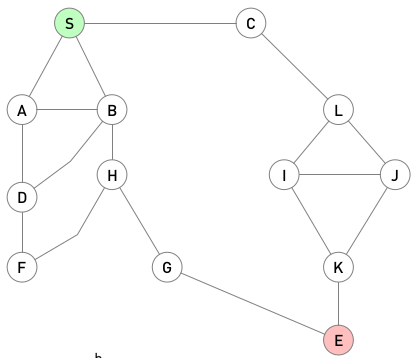

In [27]:
Image('./assets/graph.png')

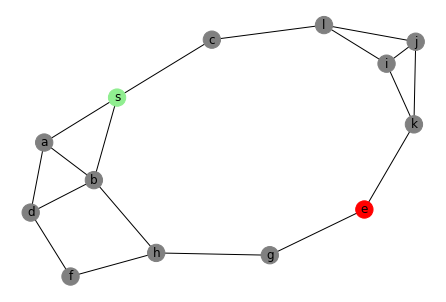

In [28]:
draw_graph(g, 's', 'e')

## British Museam
Esta é a solução mais simples. Trata-se de  expandir todos os caminhos possíveis e explorá-los a todos à procura do caminho mais curto.

In [29]:
def bm(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        (vertex, path) = q.pop(0)
        for next in graph[vertex] - set(path):
            i += 1
            if next == goal:
                print("Total iterations: ", i)
                print("Path: ", path + [next] )
                return
            else:
                q.append((next, path + [next]))

In [30]:
bm(g, 's', 'e')

Total iterations:  21
Path:  ['s', 'b', 'h', 'g', 'e']


## Breadth-First Search

In [31]:
def bfs(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1]:
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = r + sorted(e)

In [32]:
bfs(g, 's', 'e')

Total iterations:  27
Path:  ['s', 'b', 'h', 'g', 'e']


## Depth-First Search

In [33]:
def dfs(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1]:
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = sorted(e) + r

In [34]:
dfs(g, 's', 'e')

Total iterations:  8
Path:  ['s', 'a', 'b', 'd', 'f', 'h', 'g', 'e']
